In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

[1] 데이터 준비 및 피쳐/타겟 분석

In [184]:
dataDict = load_diabetes(as_frame=True,scaled=False)

In [185]:
dataDict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [186]:
# 기본 : DataFrame 형태로 반환
dataDict
dataDF = dataDict['frame']

In [187]:
# 타겟과의 상관관계 분석
# bmi,bp 사용
dataDF.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [188]:
dataDF2 = dataDF[['bmi','s5','target']]

In [189]:
dataDF2.head()

,bmi,s5,target
0,32.1,4.8598,151.0
1,21.6,3.8918,75.0
2,30.5,4.6728,141.0
3,25.3,4.8903,206.0
4,23.0,4.2905,135.0


[2] 피쳐와 타겟 분리

In [190]:
feature1 = dataDF2[['bmi']]
feature2 = dataDF2[['s5']]
target = dataDF2['target']

In [191]:
print(f'feature1 => {feature1.shape}, {feature1.ndim}')
print(f'feature2 => {feature2.shape}, {feature2.ndim}')
print(f'target => {target.shape}, {target.ndim}')

feature1 => (442, 1), 2
feature2 => (442, 1), 2
target => (442,), 1


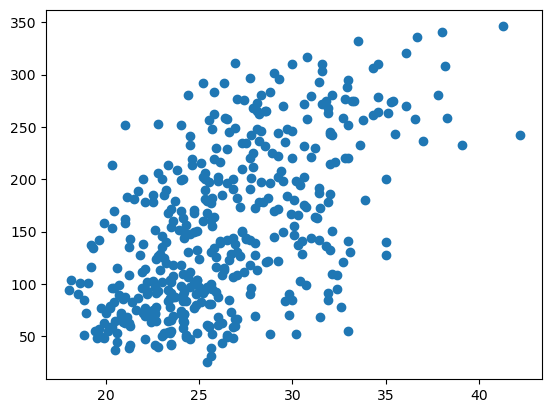

In [192]:
plt.scatter(feature1,target)
plt.show()

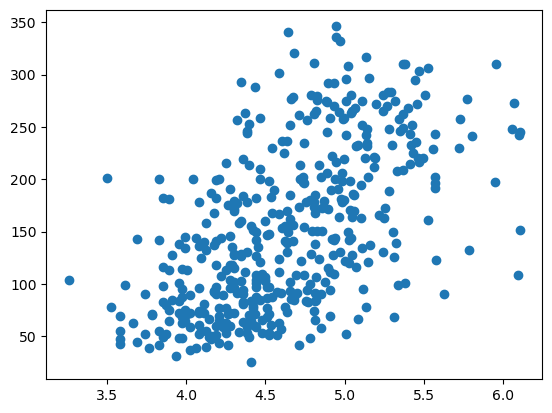

In [193]:
plt.scatter(feature2,target)
plt.show()

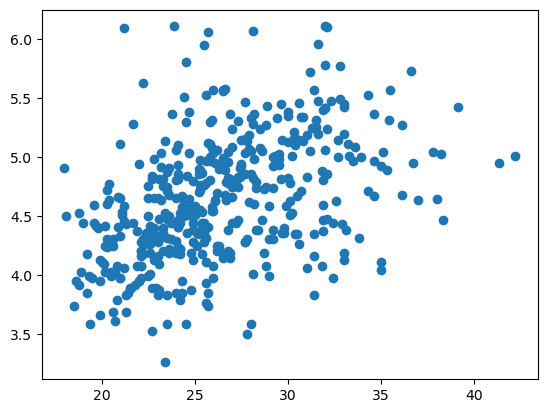

In [194]:
plt.scatter(feature1,feature2)
plt.show()

In [195]:
features = dataDF2[['bmi','s5']]

[3] 학습 준비
- 학습 알고리즘 : KNN Regressor
- 피쳐 스케일링

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

In [198]:
# train, test 비율 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test  : {X_test.shape}, {X_test.ndim}D')
print(f'y_test  : {y_test.shape}, {y_test.ndim}D')

X_train : (353, 2), 2D
y_train : (353,), 1D
X_test  : (89, 2), 2D
y_test  : (89,), 1D


[3-2] 피쳐 스케일링

In [199]:
from sklearn.preprocessing import MinMaxScaler

In [200]:
# 스케일러 인스턴스 생성
mmscler = MinMaxScaler()

In [201]:
# 스케일러에 데이터셋 전용 속성값 적용
mmscler.fit(X_train)

MinMaxScaler()

In [202]:
mmscler.data_max_

array([42.2  ,  6.107])

In [203]:
# 학습용, 테스트용 데이터셋 스케일링 진행
X_train_scaled = mmscler.transform(X_train)
X_test_scaled = mmscler.transform(X_test)

[4] 학습 진행

In [204]:
from sklearn.neighbors import KNeighborsRegressor

# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()

# 학습용 데이터셋으로 학습 진행
model.fit(X_train_scaled,y_train)

KNeighborsRegressor()

[5] 최적의 K 찾기

In [205]:
scores={}
for k in range(1,model.n_samples_fit_+1):
    model.n_neighbors = k

    score = model.score(X_test_scaled,y_test)

    scores[k]=score


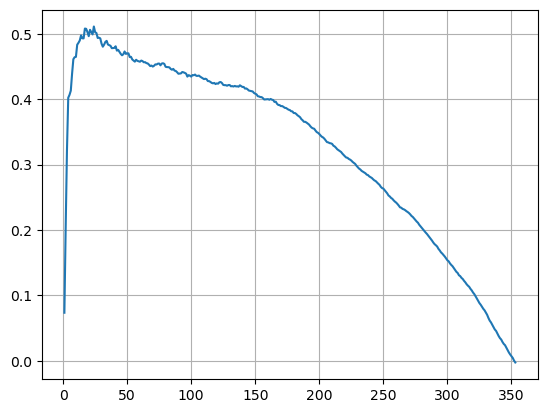

In [206]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.grid()
plt.show()

In [207]:
best_k = sorted(scores.items(), key = lambda x:x[1],reverse=True)[0][0]
best_k

24

In [208]:
# 모델에 적용 => n_neighbors에 적용
model.n_neighbors = best_k

In [209]:
model.score(X_train_scaled,y_train)

0.476255716404285